In [2]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 

import jp_mpl as jplot

from scipy import interpolate

import pickle
from matplotlib.colors import LogNorm



In [3]:
run_nr = '102529'

In [4]:
outdir = '/sb/project/qbs-015-aa/jpyanez/data/laserball_runs/trigger_verification_figures'

In [5]:
data = pickle.load(open(os.path.join(outdir, run_nr + '_data.pckl')))

all_median_manip = data['all_median_manip']
all_median_fit=data['all_median_fit']
all_qhl=data['all_qhl']
all_qhs = data['all_qhs']
all_nhit = data['all_nhit']
event_time = data['event_time']

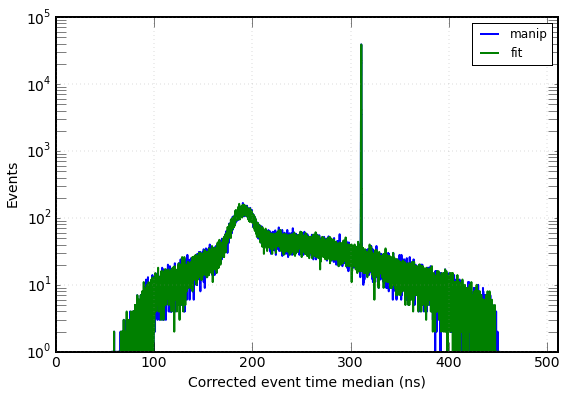

In [6]:

fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)
xaxis = np.arange(0, np.median(all_median_manip)+200, 0.05)
counts_manip, x = np.histogram(all_median_manip, xaxis)
counts_fit, x = np.histogram(all_median_fit, xaxis)


jplot.unfilledBar(xaxis, counts_manip, label='manip')
jplot.unfilledBar(xaxis, counts_fit, color='green',label='fit')

plt.yscale('log')
plt.xlabel('Corrected event time median (ns) ')
plt.xlabel('Corrected event time median (ns) ')
plt.ylabel('Events')
plt.legend(loc=0)

fig.savefig(os.path.join(outdir, run_nr + '_MedianHistogram.png'), dpi=200)

FWHM 0.320896851053


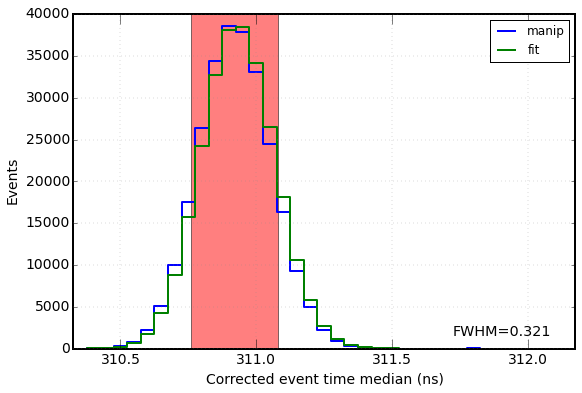

In [7]:
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)
xaxis = np.arange(np.median(all_median_manip)-0.5, np.median(all_median_manip)+1.4, 0.05)
counts_manip, x = np.histogram(all_median_manip, xaxis)
counts_fit, x   = np.histogram(all_median_fit, xaxis)

jplot.unfilledBar(xaxis, counts_manip, color = 'blue', label='manip')
jplot.unfilledBar(xaxis, counts_fit, color = 'green', label='fit')



spline = interpolate.UnivariateSpline((x[1:]+x[:-1])/2., counts_manip-counts_manip.max()/2., s=0)
r1, r2 = spline.roots()

plt.axvspan(r1, r2, facecolor='r', alpha=0.5)
print 'FWHM', r2-r1


plt.xlabel('Corrected event time median (ns) ')
plt.ylabel('Events')
ax.text(0.95, 0.04, 'FWHM='+'%0.3f' % (r2-r1),
       horizontalalignment='right',
        transform=ax.transAxes, fontsize='x-large')


plt.legend(loc=0)
fig.savefig(os.path.join(outdir, run_nr + '_MedianHistogram_zoom.png'), dpi=200)

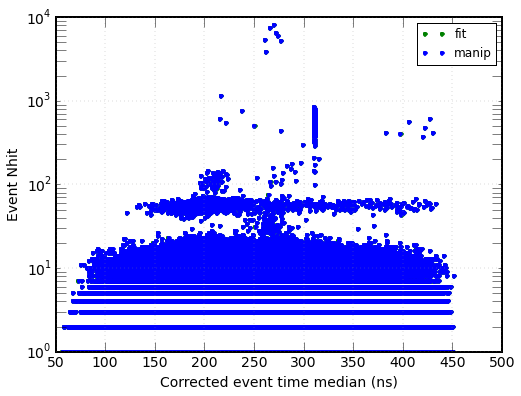

In [8]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

plt.plot(all_median_fit, all_nhit, '.g', label='fit')
plt.plot(all_median_manip, all_nhit, '.b', label='manip')

nhit_median = np.median(all_nhit)
time_median = np.median(all_median_fit)


plt.xlabel('Corrected event time median (ns) ')
plt.ylabel('Event Nhit')
plt.yscale('log')
plt.legend(loc=0)



fig.savefig(os.path.join(outdir, run_nr + '_MedianVsNhitFull.png'), dpi=200)

/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/Python/2.7.10/lib/python2.7/site-packages/numpy/lib/function_base.py:383: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


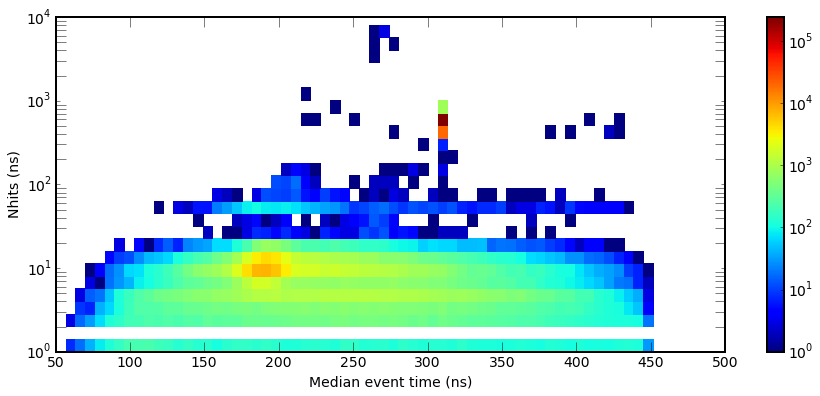

In [9]:
# I should also put a time series of the median, just to see how it changes with time
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
#plt.plot(event_time - event_time.min(), all_median_manip, '.')
xaxis = np.linspace(all_median_manip[~np.isnan(all_median_manip)].min(), 
                    all_median_manip[~np.isnan(all_median_manip)].max(),61)
yaxis = np.logspace(0, 
                    np.log10(all_nhit.max()), 27)
c, x, y = np.histogram2d(all_median_manip, 
                         all_nhit, [xaxis, yaxis])
plt.pcolor(xaxis, yaxis, c.T, norm=LogNorm(vmin=c.min()+1, vmax=c.max()))
plt.yscale('log')
plt.colorbar()

plt.ylabel('Nhits (ns)')
plt.xlabel('Median event time (ns)')
fig.savefig(os.path.join(outdir, run_nr + '_MedianVsHitsBinned.png'), dpi=200)

Pearsons correlation -0.0831082098114


/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in less


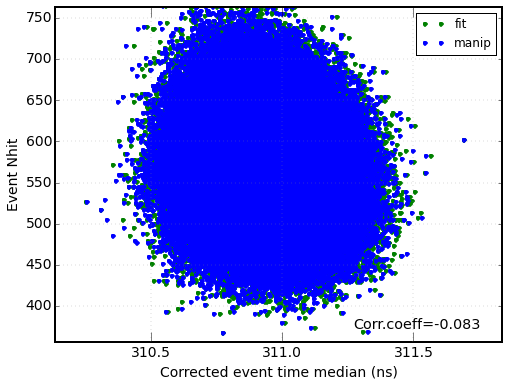

In [8]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

plt.plot(all_median_fit, all_nhit, '.g', label='fit')
plt.plot(all_median_manip, all_nhit, '.b', label='manip')

nhit_median = np.median(all_nhit)
time_median = np.median(all_median_fit)
plt.ylim(nhit_median*0.7, nhit_median*1.5)
plt.xlim(time_median-0.7, time_median+1)

plt.xlabel('Corrected event time median (ns) ')
plt.ylabel('Event Nhit')
plt.legend(loc=0)

# Pearson correlation coefficient (only things in the plot)
plotbool = ((all_nhit > (nhit_median*0.7))*
            (all_nhit < (nhit_median*1.5))*
            (all_median_manip > (time_median-0.7))*
            (all_median_manip < (time_median+1.)))

r = np.corrcoef(all_median_manip[plotbool], all_nhit[plotbool])[0,1]

ax.text(0.95, 0.04, 'Corr.coeff='+'%0.3f' % r,
       horizontalalignment='right',
        transform=ax.transAxes, fontsize='x-large')

print 'Pearsons correlation', r
fig.savefig(os.path.join(outdir, run_nr + '_MedianVsNhit.png'), dpi=200)

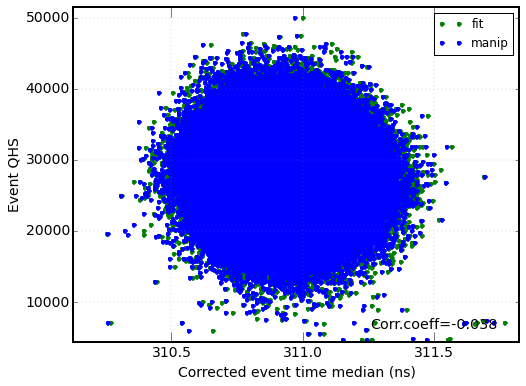

In [9]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plt.plot(all_median_fit, all_qhs, '.g', label='fit')
plt.plot(all_median_manip, all_qhs, '.b', label='manip')
nhit_median = np.median(all_qhs)
time_median = np.median(all_median_manip)
plt.ylim(nhit_median*0.2, nhit_median*2.3)
plt.xlim(time_median-0.7, time_median+1)

plt.xlabel('Corrected event time median (ns) ')
plt.ylabel('Event QHS')
plt.legend(loc=0)
r = np.corrcoef(all_median_manip[plotbool], all_qhs[plotbool])[0,1]

ax.text(0.95, 0.04, 'Corr.coeff='+'%0.3f' % r,
       horizontalalignment='right',
        transform=ax.transAxes, fontsize='x-large')
fig.savefig(os.path.join(outdir, run_nr + '_MedianVsQhs.png'), dpi=200)

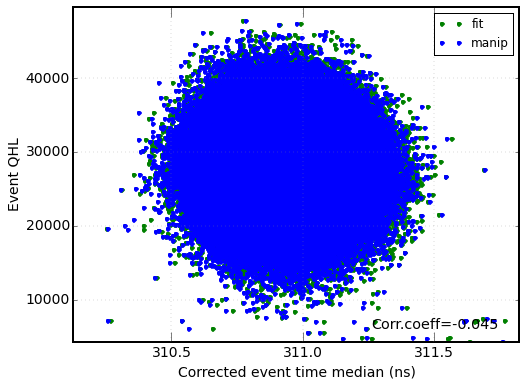

In [10]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plt.plot(all_median_fit, all_qhs, '.g', label='fit')
plt.plot(all_median_manip, all_qhs, '.b', label='manip')
nhit_median = np.median(all_qhl)
time_median = np.median(all_median_manip)
plt.ylim(nhit_median*0.2, nhit_median*2.3)
plt.xlim(time_median-0.7, time_median+1)

plt.xlabel('Corrected event time median (ns) ')
plt.ylabel('Event QHL')
plt.legend(loc=0)
r = np.corrcoef(all_median_manip[plotbool], all_qhl[plotbool])[0,1]

ax.text(0.95, 0.04, 'Corr.coeff='+'%0.3f' % r,
       horizontalalignment='right',
        transform=ax.transAxes, fontsize='x-large')
fig.savefig(os.path.join(outdir, run_nr + '_MedianVsQhl.png'), dpi=200)

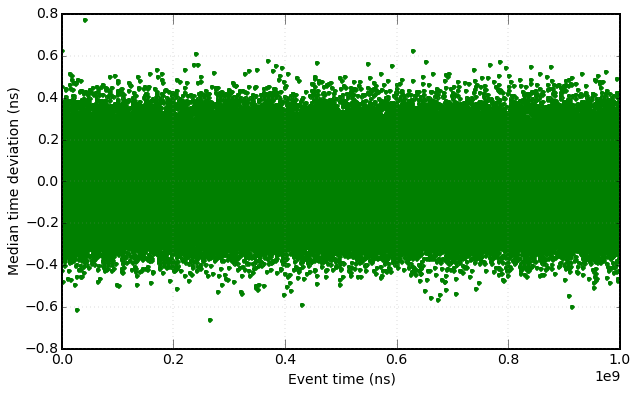

In [11]:
# I should also put a time series of the median, just to see how it changes with time
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
#plt.plot(event_time - event_time.min(), all_median_manip, '.')
plt.plot(event_time[plotbool], 
         all_median_manip[plotbool] - all_median_manip[plotbool].mean(), '.g')

plt.ylabel('Median time deviation (ns)')
plt.xlabel('Event time (ns)')
fig.savefig(os.path.join(outdir, run_nr + '_MedianVsTime.png'), dpi=200)

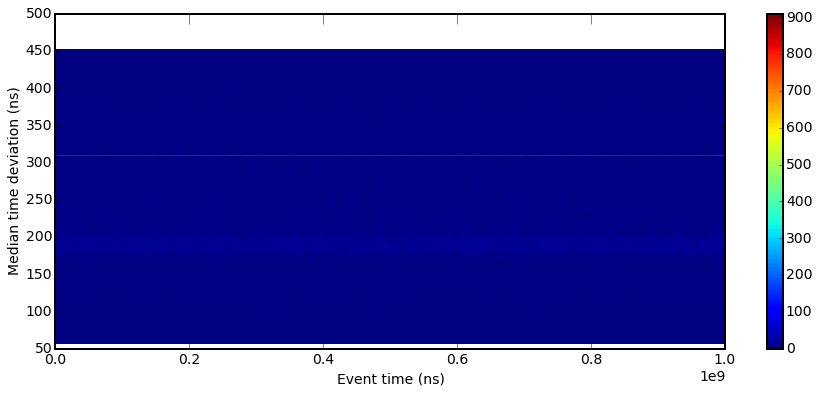

In [13]:
# I should also put a time series of the median, just to see how it changes with time
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
#plt.plot(event_time - event_time.min(), all_median_manip, '.')
xaxis = np.linspace(event_time.min(), event_time.max(),301)
yaxis = np.linspace(all_median_manip[~np.isnan(all_median_manip)].min(), 
                    all_median_manip[~np.isnan(all_median_manip)].max(), 201)
c, x, y = np.histogram2d(event_time[~np.isnan(all_median_manip)], 
                         all_median_manip[~np.isnan(all_median_manip)], [xaxis, yaxis])
plt.pcolor(xaxis, yaxis, c.T)
plt.colorbar()

plt.ylabel('Median time deviation (ns)')
plt.xlabel('Event time (ns)')
fig.savefig(os.path.join(outdir, run_nr + '_MedianVsTimeAllBinned.png'), dpi=200)